## Простая линейная регрессия с использованием Statsmodels

### Импортируем необходимые библиотеки

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Переопределим стили matplotlib по умолчанию на стили Seaborn
sns.set()

В первой части семинара мы будем использовать statsmodels. Это библиотека Python, которая предоставляет возможности для оценки различных статистических моделей, включая линейную регрессию. 

### Посмотрим на наши данные

Загружаем набор данных.

In [10]:
data = pd.read_csv('datasets/sat_gpa.csv')

Выведем нескольких случайных строк датасета.

In [11]:
data.sample(5)

,SAT,GPA
71,1778,3.59
28,2020,3.28
56,1730,3.47
64,1893,3.51
19,1786,3.19


Рассмотрим базовую статистику по данным.

In [12]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Разделим данные на зависимые и независимые переменные

Сначала выделим зависимую переменную `y`, в которую положим среднюю оценку успеваемости студентов (GPA), и независимую переменную `x1` – баллы по тесту SAT.

In [13]:
y = data['GPA']
x1 = data['SAT']

Чтобы изучить данные подробнее и далее выбрать подходящую модель, используем диаграмму рассеяния (scatter plot) для визуализации взаимосвязи между переменными.

По оси x отображаются значения независимой переменной (баллы SAT), а по оси y – значения зависимой переменной ( оценки GPA). Для построения используем функция `plt.scatter()`.

Функция `plt.show()` выводит график на экран.

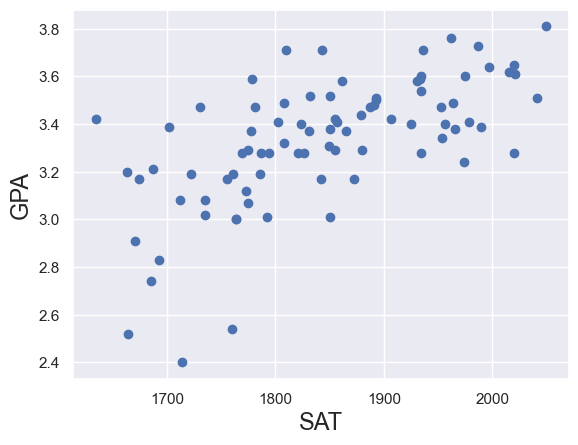

In [14]:
plt.scatter(x1, y)

plt.xlabel('SAT', fontsize=17)
plt.ylabel('GPA', fontsize=17)

plt.show()

Уравнение простой линейной регрессии имеет вид $\hat{y} = b_0 + b_1 * x_1$, где $b_0$ - это свободный коэффициент, $b_1$ - коэффициент при $x_1$.

Дополним `x1` столбцом, содержащим только единицы, с помощью метода `sm.add_constant()` и запишем результат в переменную `x`. Этот дополнительный столбец необходим для учета свободного коэффициента (intercept).

Далее для создания модели линейной регрессии используем функцию `sm.OLS()`. Функция использует метод наименьших квадратов (OLS, ordinay least squares) для оценки параметров регрессии, который находит значения коэффициентов регрессии, минимизирующие сумму квадратов остатков (разниц между фактическими и предсказанными значениями зависимой переменной). 

Чем меньше значения ошибок, тем выше способность модели к предсказаниям, и лучше качество модели.

В результате работы метода `fit()` создается объект класса RegressionResults, который содержит все результаты оценки модели линейной регрессии. С помощью метода `summary()` этот объект можно преобразовать в форматированный текстовый вывод на экран, который содержит различные статистические показатели, включая оценки коэффициентов, статистические показатели и другую информацию о модели. Всё это позволяет оценить качество модели и статистическую значимость каждого из ее параметров.

Почитать про summary подробнее можно тут: [Интерпретация summary из statsmodels для линейной регрессии](https://habr.com/ru/post/681218)

### Создадим модель простой линейной регрессии

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

In [18]:
results

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           7.20e-11
Time:                        19:19:20   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Визуализируем данные и регрессионную прямую

Построим диаграмму рассеяния независимой переменной `x1` (SAT) и зависимой переменной `y` (GPA). 

В переменную `y_hat` запишем уравнение регрессионной прямой, где `y_hat` - это предсказанные значения зависимой переменной (GPA), `x1` - значения независимой переменной (SAT), 0.0017 - коэффициент наклона регрессионной прямой, 0.275 - свободный член (intercept).

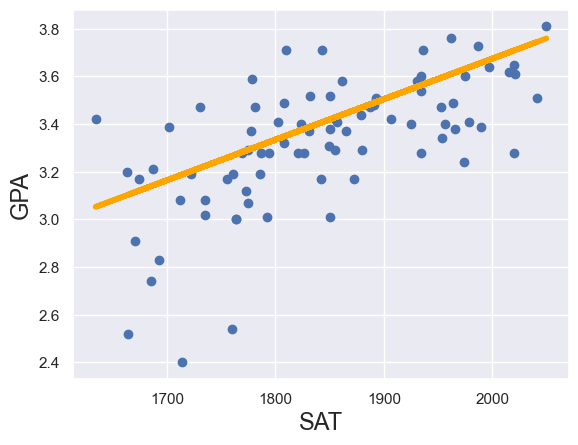

In [20]:
plt.scatter(x1, y)

y_hat = 0.275 + 0.0017 * x1

fig = plt.plot(x1, y_hat, lw=4, c='orange', label ='regression line')

plt.xlabel('SAT', fontsize=17)
plt.ylabel('GPA', fontsize=17)

plt.show()

## Множественная линейная регрессия с использованием Statsmodels

Создадим столбец со значениями, которые не несут никакого смысла и не улучшают качество модели. Заполним его случайными числами от 1 до 5 и назовём `random_numbers`.

In [21]:
data['random_numbers'] = np.random.randint(1, 5, len(data))

In [22]:
data.sample(5)

,SAT,GPA,random_numbers
83,2050,3.81,4
15,1872,3.17,1
25,1826,3.28,2
55,1887,3.47,2
18,1842,3.17,1


Как раньше выделим независимые и зависимые переменные.

In [23]:
y = data['GPA']
x1 = data.drop('GPA', axis=1)
# или так: x1 = data[['SAT', 'random_numbers']]

In [24]:
x = sm.add_constant(x1)
x.head()

,const,SAT,random_numbers
0,1.0,1714,4
1,1.0,1664,4
2,1.0,1760,2
3,1.0,1685,4
4,1.0,1693,3


In [25]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     28.75
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           3.67e-10
Time:                        19:39:19   Log-Likelihood:                 13.325
No. Observations:                  84   AIC:                            -20.65
Df Residuals:                      81   BIC:                            -13.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1796      0.417      0.431      0.668      -0.650       1.009
SAT                0.0017      0.000      7.560      0.000       0.001       0.002
random_numbers     0.0226      0.020      1.127      0.263      -0.017       0.062
==============================================================================
Omnibus:                       15.966   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.503
Skew:                          -0.854   Prob(JB):                     2.14e-05
Kurtosis:                       4.797   Cond. No.                     3.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Посмотрим как изменилось уравнение регрессии

Уравнение простой линейной регрессии имело вид $\hat{y} = b_0 + b_1 * x_1$, и в нашем случае было представлено как `y_hat = 0.0017*x1 + 0.275`.

Для множественной линейной регрессии же уравнение может быть записано следующим образом:
$\hat{y} = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n$. 

Здесь $\hat{y}$ - зависимая переменная, которую мы пытаемся объяснить; $x_1, x_2, ..., x_n$ - независимые переменные, которые мы используем для объяснения изменений в y; $b_0$ - свободный член (интерсепт), $b_1, b_2, ..., b_n$ - коэффициенты наклона (slope coefficients).

Для наших данных исходя из результатов summary уравнение будет иметь вид `y_hat = 0.2706 + 0.0017*x1 - 0.0040*x2`.

### Может визуализируем?

Визуализация множественной линейной регрессии невозможна если мы используем более 2 независимых переменных из-за того, что мы работаем в многомерном пространстве, по крайней мере на одном графике.

### А что если в данных есть категориальные переменные?

In [34]:
data = pd.read_csv('datasets/sat_gpa_attendance.csv')
data.sample(5)

,SAT,GPA,Attendance
39,1831,3.37,No
56,1730,3.47,Yes
69,1931,3.58,Yes
36,1808,3.32,Yes
70,1933,3.59,Yes


In [35]:
data.describe(include='all')

,SAT,GPA,Attendance
count,84.000000,84.000000,84
unique,NaN,NaN,2
top,NaN,NaN,No
freq,NaN,NaN,45
mean,1845.273810,3.330238,NaN
std,104.530661,0.271617,NaN
min,1634.000000,2.400000,NaN
25%,1772.000000,3.190000,NaN
50%,1846.000000,3.380000,NaN
75%,1934.000000,3.502500,NaN


### Dummy variables  (фиктивные переменные) - имитация категориальных значений числовыми

Категориальные значения не могут быть прямо использованы в алгоритмах машинного обучения, потому что они не имеют порядка или числового значения. Использование категориальных значений в линейной регрессии может привести к некорректным результатам, потому что линейная регрессия предполагает линейную зависимость между зависимой и независимыми переменными, что не может быть достигнуто с помощью категориальных значений.

Будем использовать метод `map()` для преобразования категориальных значений в числовые в столбце 'Attendance'. Метод map() принимает в качестве аргумента словарь, где ключи - это старые значения в столбце, а значения - это соответствующие новые значения, на которые необходимо заменить старые значения. В данном случае мы заменяем 'No' на 0 и 'Yes' на 1.

In [37]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [38]:
data.sample(5)

,SAT,GPA,Attendance
25,1826,3.28,0
69,1931,3.58,1
42,1966,3.38,0
65,1832,3.52,1
15,1872,3.17,1


Теперь мы можем изучить категориальный признак attendance в числовом представлении.

In [39]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [40]:
y = data['GPA']
x1 = data.drop('GPA', axis=1)

### Построим регрессию

In [41]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           2.19e-15
Time:                        19:52:24   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Посмотрим как повлиял признак Attendance на график

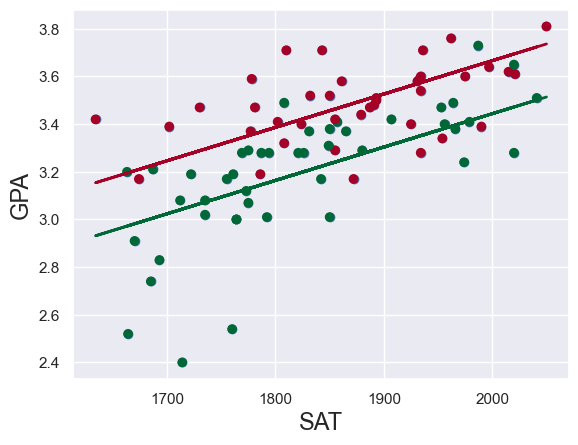

In [45]:
plt.scatter(data['SAT'], y)
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014 * data['SAT']
# yhat_no = 0.6439 + 0.0014 * data['SAT'] + 0.2226 * data['Attendance'] * 0

yhat_yes = 0.8665 + 0.0014 * data['SAT']
# yhat_yes = 0.6439 + 0.0014 * data['SAT'] + 0.2226 * data['Attendance'] * 1

fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026')

plt.xlabel('SAT', fontsize = 17)
plt.ylabel('GPA', fontsize = 17)

plt.show()

### Делаем предсказания

Создадим новый датафрейм `new_data`, чтобы использовать его для предсказания GPA на основе модели множественной линейной регрессии, которую мы уже построили.

In [46]:
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


Переименуем индексы для удобства. Код ниже переименовывает индексы (строки) в `new_data`. Индекс Софья соответствует первой строке, индекс Андрей - второй.

In [47]:
new_data.rename(index={0: 'Софья', 1: 'Андрей'})

,const,SAT,Attendance
Софья,1,1700,0
Андрей,1,1670,1


Будем использовать метод `predict()` объекта регрессии `results` для получения предсказанных значений зависимой переменной (GPA) на основе `new_data`.

In [48]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

Создадим DataFrame с данными, на основе которых делали предсказания, и с результатами предсказаний.

In [49]:
predictions_df = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictions_df)
joined.rename(index={0: 'Софья', 1: 'Андрей'})

,const,SAT,Attendance,Predictions
Софья,1,1700,0,3.023513
Андрей,1,1670,1,3.204163
